In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay, classification_report, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [3]:
df= pd.read_csv('/home/reda/Documents/jedha/soccer-tracking/dataset_passe.csv')
df

,speed,acceleration,diff_angle,label
0,0.194243,0.000000e+00,0.000000,possession
1,0.194267,2.418586e-05,0.000062,possession
2,0.194287,1.982327e-05,0.000782,possession
3,0.194301,1.394635e-05,-0.001830,possession
4,0.345452,1.511515e-01,-2.340496,start passe
...,...,...,...,...
2591,0.109933,7.459508e-02,-14.974484,possession
2592,0.109928,-5.771449e-06,-0.000855,possession
2593,0.109935,7.432516e-06,0.005435,possession
2594,0.109947,1.207908e-05,-0.003087,possession


In [ ]:
df_train

In [ ]:
labelencoder = LabelEncoder()
Y_train = labelencoder.fit_transform(Y_train)

In [8]:
X = df_train[["age","total_pages_visited","country","new_user","source"]]
Y = df_train["converted"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0, stratify=Y)

In [22]:
#X_train= df_train[["age","total_pages_visited","country","new_user","source"]]
#X_test= df_test[["age","total_pages_visited","country","new_user","source"]]
#Y_train = df_train["converted"]
#Y_test = df_test["converted"]

### Preprocessing


In [9]:
numeric_features = ["age","total_pages_visited"] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])
categorical_features = ["country","new_user","source"] # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Logistic Regression

In [25]:
model = LogisticRegression(class_weight='balanced', penalty='l2')
model.fit(X_train,Y_train)
print(model.score(X_test,Y_test))
print(model.score(X_train,Y_train))
print(classification_report(y_true = Y_test, y_pred=model.predict(X_test)))
print(recall_score(y_true = Y_test, y_pred=model.predict(X_test)))



0.9416098578021411
0.9413069887453189
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     82620
           1       0.35      0.94      0.51      2754

    accuracy                           0.94     85374
   macro avg       0.67      0.94      0.74     85374
weighted avg       0.98      0.94      0.95     85374

0.9415395787944808


In [57]:
model = LogisticRegression(penalty='l2')
params = {
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag' ,'saga'],
    'C': [1e-2, 1e-1, 1,5,10,20,30],
    'class_weight': [{0:1,1:5}, {0:1,1:2}, {0:1,1:3},None]
}
gridsearch = GridSearchCV(model, param_grid = params, cv = 10, n_jobs=-1, scoring='f1_macro') # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

...Done.
Best hyperparameters :  {'C': 0.1, 'class_weight': {0: 1, 1: 2}, 'solver': 'liblinear'}
Best validation accuracy :  0.8811261214019636


In [58]:
best_LogR = LogisticRegression(class_weight={0:1,1:2}, penalty='l2', solver= 'liblinear', C=0.1)
best_LogR.fit(X_train,Y_train)
print(best_LogR.score(X_test,Y_test))
print(best_LogR.score(X_train,Y_train))
print(classification_report(y_true = Y_test, y_pred=best_LogR.predict(X_test)))
print(recall_score(y_true = Y_test, y_pred=best_LogR.predict(X_test)))



0.9850071450324455
0.9853167073280925
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82620
           1       0.77      0.76      0.77      2754

    accuracy                           0.99     85374
   macro avg       0.88      0.88      0.88     85374
weighted avg       0.98      0.99      0.98     85374

0.7585330428467684


In [54]:
best_LogR = LogisticRegression(class_weight=None, penalty='l2', solver= 'saga', C=0.1)
best_LogR.fit(X_train,Y_train)
print(best_LogR.score(X_test,Y_test))
print(best_LogR.score(X_train,Y_train))
print(classification_report(y_true = Y_test, y_pred=best_LogR.predict(X_test)))
print(recall_score(y_true = Y_test, y_pred=best_LogR.predict(X_test)))

0.9858504931243705
0.9863257130809313
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     82620
           1       0.85      0.68      0.76      2754

    accuracy                           0.99     85374
   macro avg       0.92      0.84      0.87     85374
weighted avg       0.98      0.99      0.99     85374

0.681917211328976


In [11]:
X

,age,total_pages_visited,country,new_user,source
0,22,2,China,1,Direct
1,21,3,UK,1,Ads
2,20,14,Germany,0,Seo
3,23,3,US,1,Seo
4,28,3,US,1,Direct
...,...,...,...,...,...
284575,36,1,US,1,Ads
284576,31,2,US,1,Seo
284577,41,5,US,1,Seo
284578,31,4,US,1,Direct


In [13]:
#model-2
best_LogR = LogisticRegression(class_weight='balanced', penalty='l2', solver= 'saga', C=0.1)
X_proc = preprocessor.fit_transform(df_train[["age","total_pages_visited","country","new_user","source"]])
best_LogR.fit(X_proc,Y)
X_test_comp = preprocessor.transform(df_test)
Y_test_comp =best_LogR.predict(X_test_comp)
df_test_pred = pd.DataFrame(data=Y_test_comp, columns=['converted'])
df_test_pred.to_csv('conversion_data_test_predictions_REDA-model2.csv', index=False)

In [21]:
#model-2nobalance
best_LogR = LogisticRegression(penalty='l2', solver= 'saga', C=0.1)
X_proc = preprocessor.fit_transform(df_train[["age","total_pages_visited","country","new_user","source"]])
best_LogR.fit(X_proc,Y)
X_test_comp = preprocessor.transform(df_test)
Y_test_comp =best_LogR.predict(X_test_comp)
df_test_pred = pd.DataFrame(data=Y_test_comp, columns=['converted'])
df_test_pred.to_csv('conversion_data_test_predictions_REDA-model2nobalance.csv', index=False)

In [59]:
#model-2custombalance
best_LogR = LogisticRegression(class_weight={0:1,1:2}, penalty='l2', solver= 'liblinear', C=0.1)
X_proc = preprocessor.fit_transform(df_train[["age","total_pages_visited","country","new_user","source"]])
best_LogR.fit(X_proc,Y)
X_test_comp = preprocessor.transform(df_test)
Y_test_comp =best_LogR.predict(X_test_comp)
df_test_pred = pd.DataFrame(data=Y_test_comp, columns=['converted'])
df_test_pred.to_csv('conversion_data_test_predictions_REDA-model2custombalance.csv', index=False)

In [25]:
model = LogisticRegression(penalty='l2')
params = {
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag' ,'saga'],
    'C': [1e-2, 1e-1, 1,5,10,20,30]
}
gridsearch = GridSearchCV(model, param_grid = params, cv = 10, n_jobs=-1, verbose=3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
...Done.
Best hyperparameters :  {'C': 1, 'solver': 'lbfgs'}
Best validation accuracy :  0.9863608563061039


In [26]:
best_LogR = LogisticRegression( penalty='l2', solver= 'lbfgs', C=1)
best_LogR.fit(X_train, Y_train)
print(best_LogR.score(X_test,Y_test))
print(best_LogR.score(X_train,Y_train))
print(classification_report(y_true = Y_test, y_pred=best_LogR.predict(X_test)))
print(recall_score(y_true = Y_test, y_pred=best_LogR.predict(X_test)))

0.9859207721320308
0.9863759123721173
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     82620
           1       0.85      0.69      0.76      2754

    accuracy                           0.99     85374
   macro avg       0.92      0.84      0.88     85374
weighted avg       0.99      0.99      0.99     85374

0.6862745098039216


In [27]:
#model5
best_LogR = LogisticRegression( penalty='l2', solver= 'lbfgs', C=1)
X_proc = preprocessor.fit_transform(df_train[["age","total_pages_visited","country","new_user","source"]])
best_LogR.fit(X_proc,Y)
X_test_comp = preprocessor.transform(df_test)
Y_test_comp =best_LogR.predict(X_test_comp)
df_test_pred = pd.DataFrame(data=Y_test_comp, columns=['converted'])
df_test_pred.to_csv('conversion_data_test_predictions_REDA-model5.csv', index=False)

[CV 5/10] END alpha=0.01, class_weight=balanced;, score=0.951 total time=   0.2s
[CV 7/10] END .alpha=0.1, class_weight=balanced;, score=0.955 total time=   0.1s
[CV 4/10] END ..alpha=0.0001, class_weight=None;, score=0.970 total time=   0.2s
[CV 10/10] END ..alpha=1e-10, class_weight=None;, score=0.970 total time=   0.2s
[CV 8/10] END .............C=0.01, solver=lbfgs;, score=0.987 total time=   0.6s
[CV 2/10] END ...............C=0.01, solver=sag;, score=0.986 total time=   1.8s
[CV 8/10] END ..........C=0.1, solver=newton-cg;, score=0.987 total time=   1.8s
[CV 2/10] END ............C=1, solver=newton-cg;, score=0.986 total time=   1.8s
[CV 3/10] END ................C=5, solver=lbfgs;, score=0.986 total time=   0.3s
[CV 1/10] END ............C=5, solver=liblinear;, score=0.985 total time=   1.2s
[CV 9/10] END ............C=5, solver=newton-cg;, score=0.986 total time=   1.5s
[CV 1/10] END ...............C=10, solver=lbfgs;, score=0.985 total time=   0.4s
[CV 6/10] END ..............

### Ridge

In [23]:
model = RidgeClassifier()
params = {
    'alpha': [1e-2, 1e-1, 1e-3,1e-4,1e-10,1e-11],
    'class_weight':[None, 'balanced']
}
gridsearch = GridSearchCV(model, param_grid = params, cv = 10, n_jobs=-1, verbose=3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best hyperparameters :  {'alpha': 0.01, 'class_weight': None}
Best validation accuracy :  0.9695691913782332


In [24]:
best_ridge= RidgeClassifier(0.01)
best_ridge.fit(X_train,Y_train)
Y_test_pred = best_ridge.predict(X_test)
print(best_ridge.score(X_test, Y_test))
print(best_ridge.coef_)
print(classification_report(y_true = Y_test, y_pred=best_ridge.predict(X_test)))


0.9694989106753813
[[-0.02202347  0.18138024  0.08250978  0.07193744  0.05161908 -0.08126819
  -0.00789379 -0.00226407]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     82620
           1       1.00      0.05      0.10      2754

    accuracy                           0.97     85374
   macro avg       0.98      0.53      0.54     85374
weighted avg       0.97      0.97      0.96     85374



In [37]:
X_train_sel.values.reshape(-1, 1)

array([[4],
       [7],
       [1],
       ...,
       [1],
       [9],
       [8]])

### FEATURE SELECTION

In [41]:

X_sel = df_train[["total_pages_visited"]]
Y_sel = df_train["converted"]
X_train_sel, X_test_sel, Y_train_sel, Y_test_sel = train_test_split(X_sel, Y_sel, test_size = 0.3, random_state = 0, stratify=Y)
scaler = StandardScaler()
X_train_sel = scaler.fit_transform(X_train_sel)
X_test_sel = scaler.transform(X_test_sel)
best_LogR = LogisticRegression( penalty='l2', solver= 'lbfgs', C=1)
best_LogR.fit(X_train_sel, Y_train_sel)
print(best_LogR.score(X_test_sel,Y_test_sel))
print(best_LogR.score(X_train_sel,Y_train_sel))
print(classification_report(y_true = Y_test, y_pred=best_LogR.predict(X_test_sel)))
print(recall_score(y_true = Y_test, y_pred=best_LogR.predict(X_test_sel)))




0.9823014032375196
0.9832384566729918
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     82620
           1       0.81      0.59      0.68      2754

    accuracy                           0.98     85374
   macro avg       0.90      0.79      0.84     85374
weighted avg       0.98      0.98      0.98     85374

0.5925925925925926


In [43]:
# model5-1feature
best_LogR = LogisticRegression( penalty='l2', solver= 'lbfgs', C=1)
scaler = StandardScaler()
X_proc = scaler.fit_transform(df_train[["total_pages_visited"]])
best_LogR.fit(X_proc,Y)
X_test_comp = scaler.transform(df_test[["total_pages_visited"]])
Y_test_comp =best_LogR.predict(X_test_comp)
df_test_pred = pd.DataFrame(data=Y_test_comp, columns=['converted'])
df_test_pred.to_csv('conversion_data_test_predictions_REDA-model5-1feature.csv', index=False)

### SVM

In [62]:
classifier = SVC(gamma= 1e-5,)

params = {
    'kernel':['linear', 'poly', 'rbf'],
    'C' :[10,7],
    'class_weight':[{0:1,1:2},{0:1,1:3}]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3, n_jobs=-1, verbose=1,scoring='f1_macro') # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
...Done.
Best hyperparameters :  {'C': 7, 'class_weight': {0: 1, 1: 2}, 'gamma': 1e-05, 'kernel': 'linear'}
Best validation accuracy :  0.8810834478102058


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82620
           1       0.77      0.76      0.77      2754

    accuracy                           0.98     85374
   macro avg       0.88      0.88      0.88     85374
weighted avg       0.98      0.98      0.98     85374



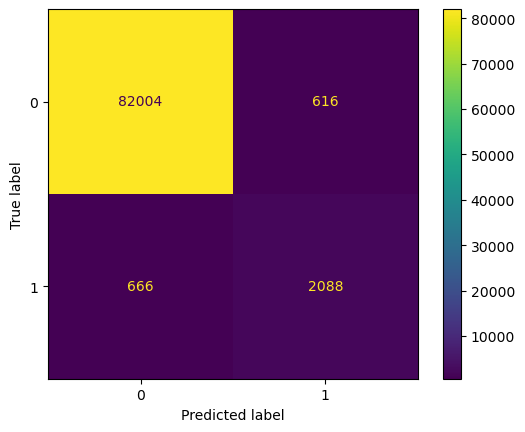

In [63]:
best_svm = SVC(kernel = 'linear', C= 7, gamma=1e-5, class_weight= {0: 1, 1: 2})
best_svm.fit(X_train,Y_train)
Y_test_pred = best_svm.predict(X_test)
print(classification_report(y_true = Y_test, y_pred=best_svm.predict(X_test)))

cm = confusion_matrix(Y_test, Y_test_pred, labels=best_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm.classes_)
disp.plot()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     82620
           1       0.35      0.94      0.51      2754

    accuracy                           0.94     85374
   macro avg       0.67      0.94      0.74     85374
weighted avg       0.98      0.94      0.95     85374



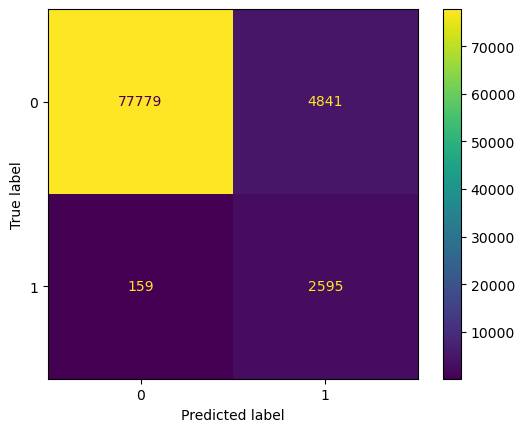

In [18]:
best_svm2 = SVC(kernel = 'linear', C= 7, gamma=1e-5, class_weight='balanced')
best_svm2.fit(X_train,Y_train)
Y_test_pred = best_svm2.predict(X_test)
print(classification_report(y_true = Y_test, y_pred=Y_test_pred))

cm = confusion_matrix(Y_test, Y_test_pred, labels=best_svm2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm2.classes_)
disp.plot()

In [19]:
#model-3
best_SVM =  SVC(kernel = 'linear', C= 7, gamma=1e-5)
X_proc = preprocessor.fit_transform(df_train[["age","total_pages_visited","country","new_user","source"]])
best_SVM.fit(X_proc,Y)
X_test_comp = preprocessor.transform(df_test)
Y_test_comp =best_SVM.predict(X_test_comp)
df_test_pred = pd.DataFrame(data=Y_test_comp, columns=['converted'])
df_test_pred.to_csv('conversion_data_test_predictions_REDA-model3.csv', index=False)

In [20]:
#model-4
best_SVM2 =  SVC(kernel = 'linear', C= 7, gamma=1e-5, class_weight='balanced')
X_proc = preprocessor.fit_transform(df_train[["age","total_pages_visited","country","new_user","source"]])
best_SVM2.fit(X_proc,Y)
X_test_comp = preprocessor.transform(df_test)
Y_test_comp =best_SVM2.predict(X_test_comp)
df_test_pred = pd.DataFrame(data=Y_test_comp, columns=['converted'])
df_test_pred.to_csv('conversion_data_test_predictions_REDA-model4.csv', index=False)

In [64]:
#model-3customweight
best_SVM = SVC(kernel = 'linear', C= 7, gamma=1e-5, class_weight= {0: 1, 1: 2})
X_proc = preprocessor.fit_transform(df_train[["age","total_pages_visited","country","new_user","source"]])
best_SVM.fit(X_proc,Y)
X_test_comp = preprocessor.transform(df_test)
Y_test_comp =best_SVM.predict(X_test_comp)
df_test_pred = pd.DataFrame(data=Y_test_comp, columns=['converted'])
df_test_pred.to_csv('conversion_data_test_predictions_REDA-model3customweight.csv', index=False)

### RF

In [65]:
regressor = RandomForestClassifier(random_state=0, criterion='entropy')
params = {
    'n_estimators': [17,20,23],
    'max_depth': [17,20,23],
    'min_samples_split': [2,3,5,7],
    'class_weight': [{0:1,1:2}, {0:1,1:3}]
    
}
grid_random = GridSearchCV(regressor, param_grid = params, cv = 5, n_jobs=-1, scoring='f1_macro') # cv : the number of folds to be used for CV
grid_random.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", grid_random.best_params_)

...Done.
Best hyperparameters :  {'class_weight': {0: 1, 1: 2}, 'max_depth': 20, 'min_samples_split': 7, 'n_estimators': 23}


In [66]:
best_random = RandomForestClassifier(random_state=0, criterion='entropy', class_weight={0: 1, 1: 2}, max_depth= 20, min_samples_split=7, n_estimators=23, bootstrap=True)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82620
           1       0.76      0.72      0.74      2754

    accuracy                           0.98     85374
   macro avg       0.88      0.86      0.87     85374
weighted avg       0.98      0.98      0.98     85374



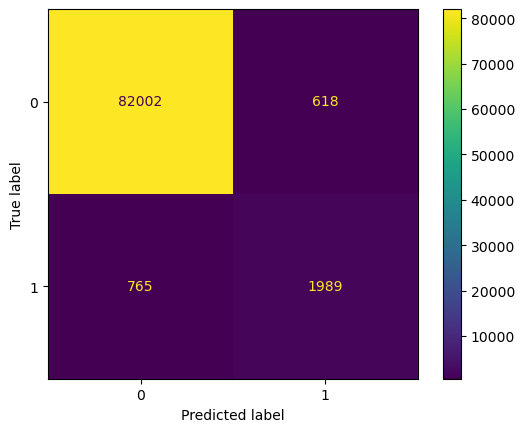

In [67]:
best_random.fit(X_train,Y_train)
Y_test_pred = best_random.predict(X_test)
print(classification_report(y_true = Y_test, y_pred=best_random.predict(X_test)))

cm = confusion_matrix(Y_test, Y_test_pred, labels=best_random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_random.classes_)
disp.plot()

In [72]:
best_LogR = LogisticRegression(class_weight={0:1,1:2}, penalty='l2', solver= 'liblinear', C=0.1)
best_random = RandomForestClassifier(random_state=0, criterion='entropy', class_weight={0: 1, 1: 2}, 
                                     max_depth= 20, min_samples_split=7, n_estimators=23, bootstrap=True)
best_SVM = SVC(kernel = 'linear', C= 7, gamma=1e-5, class_weight= {0: 1, 1: 2}, probability=True)

votingClf = VotingClassifier([('clf1',best_LogR),('clf2',best_SVM), ('clf3',best_random)],voting='soft') #

adaBoostClassifier = AdaBoostClassifier(base_estimator = votingClf)
adaBoostClassifier.fit(X_train, Y_train)
print(classification_report(y_true = Y_test, y_pred=adaBoostClassifier.predict(X_test)))
print(classification_report(y_true = Y_test, y_pred=adaBoostClassifier.predict(X_test)))
# model 1 to amir

/home/reda/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



KeyboardInterrupt: 

In [35]:
#votingClf = VotingClassifier([('clf1',model),('clf2',best_ridge), ('clf3',best_random)],voting='hard') #

#adaBoostClassifier = AdaBoostClassifier(base_estimator = votingClf)
#adaBoostClassifier.fit(X_train, Y_train)
#print(classification_report(y_true = Y_test, y_pred=adaBoostClassifier.predict(X_test)))



In [36]:
X_test_comp = preprocessor.transform(df_test)
Y_test_comp =adaBoostClassifier.predict(X_test_comp)

In [37]:

df_test_pred = pd.DataFrame(data=Y_test_comp, columns=['converted'])
df_test_pred.to_csv('conversion_data_test_predictions_REDA-model1.csv', index=False)

In [118]:
votingClf = vClassifier(estimators=[('clf1',model), ('clf3',best_random)]) #

adaBoostClassifier = AdaBoostClassifier(estimator = votingClf)
adaBoostClassifier.fit(X_train, Y_train)
print(classification_report(y_true = Y_test, y_pred=adaBoostClassifier.predict(X_test)))



InvalidParameterError: The 'estimator' parameter of AdaBoostClassifier must be an object implementing 'fit' and 'predict' or None. Got StackingClassifier(estimators=[('clf1', LogisticRegression()),
                               ('clf3',
                                RandomForestClassifier(class_weight='balanced_subsample',
                                                       criterion='entropy',
                                                       max_depth=20,
                                                       min_samples_split=5,
                                                       n_estimators=20,
                                                       random_state=0))]) instead.